In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


import my dataset

In [2]:
df_train_copy = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df = df_train_copy
train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test_copy = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df = df_test_copy
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
##check the coolumn with null values and know the type of data  in each column each columns h

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
##checking out information on  the categorical data
train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# EDA

****

In [9]:
##checking the number of unique values in each column
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

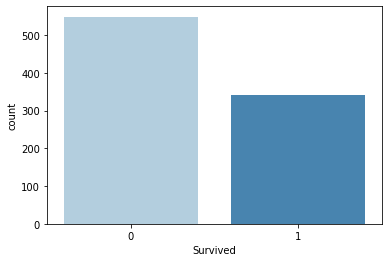

In [10]:
##checking if the  target column survived is a imbalane or balance datast
sns.countplot(x='Survived',data=train_df,palette='Blues')

In [11]:
##checcking the the amunt of male and 
##female that survived the incident as we can see below more female survived than male
train_df[['Survived','Sex']].groupby(['Sex'],as_index=False).sum()

,Sex,Survived
0,female,233
1,male,109


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x504 with 0 Axes>

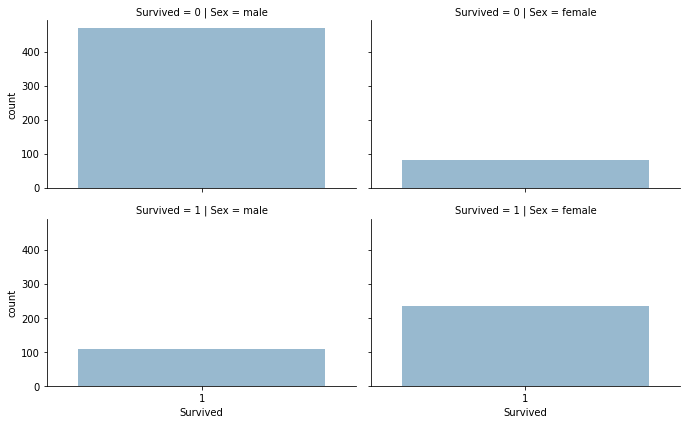

In [12]:
plt.figure(figsize=(15,7))
g=sns.FacetGrid(train_df,row='Survived',col='Sex',aspect=1.6)
g.map(sns.countplot,'Survived',alpha=.5)
g.add_legend()


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x504 with 0 Axes>

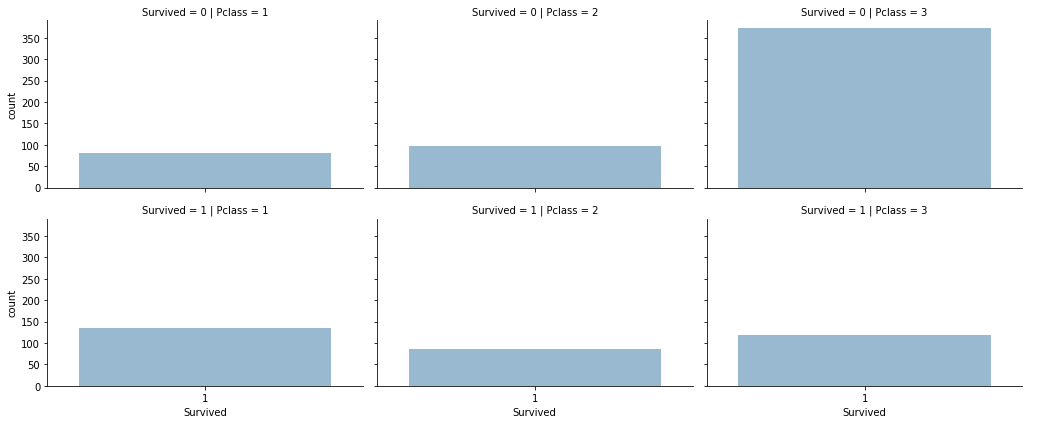

In [13]:

plt.figure(figsize=(15,7))
g=sns.FacetGrid(train_df,row='Survived',col='Pclass',aspect=1.6)
g.map(sns.countplot,'Survived',alpha=.5)
g.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x504 with 0 Axes>

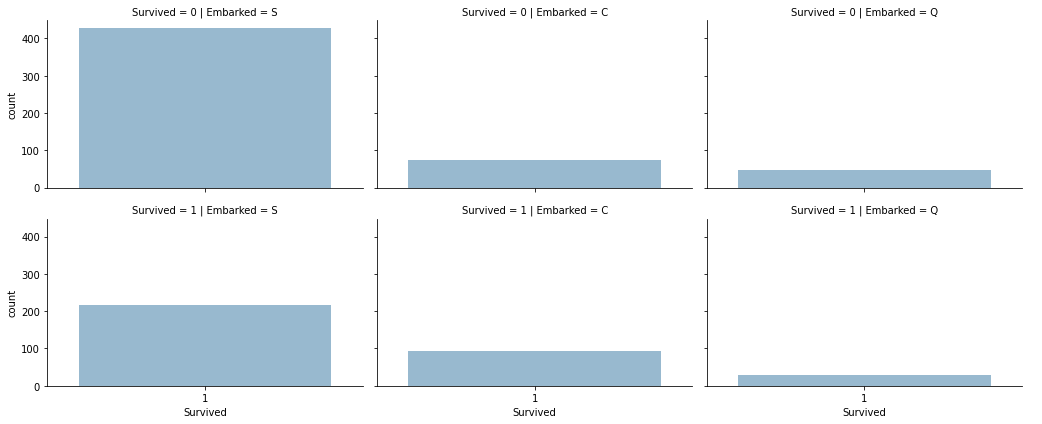

In [14]:
plt.figure(figsize=(15,7))
g=sns.FacetGrid(train_df,row='Survived',col='Embarked',aspect=1.6)
g.map(sns.countplot,'Survived',alpha=.5)
g.add_legend()

In [15]:
train_df[['Survived','SibSp']].groupby(['SibSp'],as_index=False).sum()

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


In [16]:
train_df[['Survived','Parch']].groupby(['Parch'],as_index=False).sum()

,Parch,Survived
0,0,233
1,1,65
2,2,40
3,3,3
4,4,0
5,5,1
6,6,0


<AxesSubplot:xlabel='Age', ylabel='Count'>

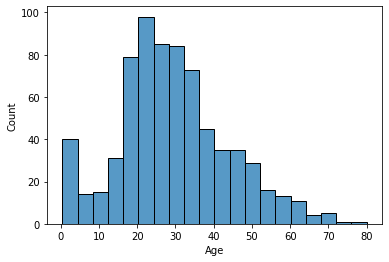

In [17]:
sns.histplot(train_df['Age'])

,Age,Survived
0,0-30,166
1,31-50,102
2,51-65,21
3,65-inf,1


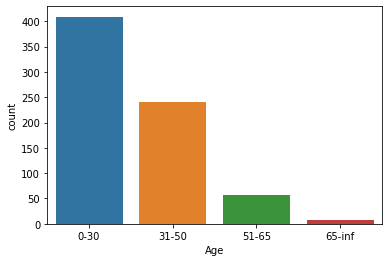

In [18]:
def transform_to_ordinal(df):
    df.loc[ df['Age'] <= 30, 'Age'] = 0
    df.loc[(df['Age'] > 30) & (df['Age'] <= 50), 'Age'] = 1
    df.loc[(df['Age'] > 50) & (df['Age'] <= 65), 'Age']   = 2
    df.loc[ df['Age'] > 65, 'Age'] = 3
    df['Age'] = df['Age'].astype(int)
    
def transform_to_range(df):
    df['Age'] = data['Age'].map({0:'0-30',1:'31-50',2:'51-65',3:'65-inf'})
    df['Age']=df['Age'].astype(str)
data= train_df.copy()
data2= test_df.copy()
data.dropna(subset=['Age'],inplace=True)
data2.dropna(subset=['Age'],inplace=True)
transform_to_ordinal(data)
transform_to_ordinal(data2)
transform_to_range(data)
transform_to_range(data2)
sns.countplot(data=data,x='Age')
data[['Age','Survived']].groupby(['Age'],as_index=False).sum()

    

# PREPROCESSING

In [19]:
##drop features that are not going to be use by the data  passenger_id(is not needed by our model)
##,name,'cabin(too many unique value)'ticket(too many unique value to deal with),
def drop_features(df):
    features_to_drop=['PassengerId', 'Name', 'Cabin','Ticket']
    df=df.drop(features_to_drop,inplace=True,axis=1)
    return df
drop_features(train_df)
drop_features(test_df)
    

In [20]:
train_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
##checking the  column with null values
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [22]:
# i dropped the null values of embarked because there only 0.22% of the dataset
train_df.loc[train_df['Embarked'].isnull()]
train_df.dropna(subset=['Embarked'],inplace=True)
test_df.dropna(subset=['Embarked'],inplace=True)

In [23]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [24]:
# i filled my age null value with the meadian of the dataset
def fillna_age(data1,data2):
    dataset = pd.concat([data1['Age'],data2['Age']],axis=0,ignore_index=True)
    median_age=dataset.median().astype(int)
    data1['Age']=data1['Age'].fillna(median_age).astype(int)
    data2['Age']=data2['Age'].fillna(median_age).astype(int)
    

In [25]:
fillna_age(train_df,test_df)

In [26]:
train_df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,28,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


In [28]:
# mapped my sex columns male:0 and female:1
def map_sex(df):
    df['Sex']=df['Sex'].map({'male':0,'female':1})
map_sex(train_df)
map_sex(test_df)

In [29]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7.8292,Q
1,3,1,47,1,0,7.0000,S
2,2,0,62,0,0,9.6875,Q
3,3,0,27,0,0,8.6625,S
4,3,1,22,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,0,28,0,0,8.0500,S
414,1,1,39,0,0,108.9000,C
415,3,0,38,0,0,7.2500,S
416,3,0,28,0,0,8.0500,S


In [30]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False,).sum()

,Embarked,Survived
0,C,93
1,Q,30
2,S,217


In [31]:
# mapped my embarked column 'Q':0,'C':1,'S':2
def embarked_encode(df):
    df['Embarked']=df['Embarked'].map({'Q':0,'C':1,'S':2})
embarked_encode(train_df)
embarked_encode(test_df)



In [32]:
## encode my  sibsp ,parch to ordinal features
def  enconde_ordinal_fetures(df):
    df.loc[df['SibSp'] == 0, 'SibSp'] = 0
    df.loc[(df['SibSp'] >= 1) & (df['SibSp'] <= 2), 'SibSp'] = 1
    df.loc[df['SibSp'] >= 3, 'SibSp'] = 2
    
    df.loc[df['Parch'] == 0, 'Parch'] = 0
    df.loc[(df['Parch'] >= 1) & (df['Parch'] <= 2), 'Parch'] = 1
    df.loc[df['Parch'] >= 3, 'Parch'] = 2

enconde_ordinal_fetures(test_df)
enconde_ordinal_fetures(train_df)
    

    
    

In [33]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,2
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,2
3,1,1,1,35,1,0,53.1000,2
4,0,3,0,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,2
887,1,1,1,19,0,0,30.0000,2
888,0,3,1,28,1,1,23.4500,2
889,1,1,0,26,0,0,30.0000,1


In [34]:
test_df
test_df=test_df.fillna(test_df['Fare'].mean())
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
print(f'the number of rows in the training data is {train_df.shape[0]} and number of column is {train_df.shape[1]}' )

the number of rows in the training data is 889 and number of column is 8


In [36]:
print(f'the number of rows in the training data is {test_df.shape[0]} and number of column is {test_df.shape[1]}' )

the number of rows in the training data is 418 and number of column is 7


In [37]:
Y_train = train_df['Survived'].values
X_train = train_df.drop('Survived',axis=1).values

In [38]:
X_train

array([[ 3.    ,  0.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  1.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 3.    ,  1.    , 28.    , ...,  1.    , 23.45  ,  2.    ],
       [ 1.    ,  0.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 3.    ,  0.    , 32.    , ...,  0.    ,  7.75  ,  0.    ]])

# **MODEL**

In [39]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [40]:
model =  XGBClassifier(objective='multi:softmax',
                              num_class=2,
                              n_estimators = 400,
                              max_depth = 10, 
                              learning_rate = 0.05,
                              random_state=42,
                              eval_metric='mlogloss')

In [41]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=10, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=42, ...)

In [42]:
X_test= test_df.values
X_test

array([[ 3.    ,  0.    , 34.    , ...,  0.    ,  7.8292,  0.    ],
       [ 3.    ,  1.    , 47.    , ...,  0.    ,  7.    ,  2.    ],
       [ 2.    ,  0.    , 62.    , ...,  0.    ,  9.6875,  0.    ],
       ...,
       [ 3.    ,  0.    , 38.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 3.    ,  0.    , 28.    , ...,  0.    ,  8.05  ,  2.    ],
       [ 3.    ,  0.    , 28.    , ...,  1.    , 22.3583,  1.    ]])

In [43]:
y_predicted=model.predict(X_test)

In [44]:
y_predicted


array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
print(f'The accuracy score of the  xgbclassfier model {round(model.score(X_train,Y_train)*100,2)}%')

The accuracy score of the  xgbclassfier model 97.86%


In [46]:
model_random = RandomForestClassifier(random_state=42, max_depth=6)
model_random.fit(X_train, Y_train)
Y_predict_random = model_random.predict(X_test)

In [47]:
print(f'The accuracy score of the  xgbclassfier model {round(model_random.score(X_train,Y_train)*100,2)}%')

The accuracy score of the  xgbclassfier model 87.18%


In [48]:
model_lgbm = LGBMClassifier(is_unbalance=True, random_state=42)
model_lgbm.fit(X_train, Y_train)
predict_lgbm = model_lgbm.predict(X_test)
print(f'The accuracy score of the  xgbclassfier model {round(model_lgbm.score(X_train,Y_train)*100,2)}%')

The accuracy score of the  xgbclassfier model 94.38%


The model with the highest accurcay is xgboost so  am going with the xgboost model

In [49]:
submission_data= pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [50]:
submission = pd.DataFrame({
         "PassengerId": submission_data["PassengerId"],
        "Survived": y_predicted
    })

In [51]:
submission_csv = submission.to_csv('submission.csv', index=False)